In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import gensim
import numpy as np
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from collections import Counter


/Users/shreysamdani/anaconda3/envs/nlp/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/shreysamdani/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int

In [252]:
df = pd.read_csv('../rapid_news_cleaned.csv', parse_dates=True, index_col='date').dropna()
df.head()

,body,description,search_string,title,url
date,,,,,
2021-05-05,tweet bumbl nasdaq bmbl post quarter earn result market close wednesday analyst expect bumbl post earn share quarter person wish regist compani earn confer link bumbl nasdaq bmbl issu quarter earn result tuesday march compani report earn share ep quarter beat consensus estim firm revenu million quarter compar analyst estim million compani revenu yearoveryear basi bumbl alert share bmbl stockopen wednesday bumbl year low year high firm day averag price sever brokerag recent issu report bmbl loop capit began coverag bumbl research report tuesday march set hold rate price target stock raymond jame initi coverag bumbl report monday march issu market perform rate stock btig research initi coverag bumbl report monday april issu buy rate target price stock stifel nicolaus lift target price bumbl gave stock buy rate report wednesday march final citigroup initi coverag bumbl report monday march issu buy rate target price stock seven invest analyst rate stock hold rate seven issu buy rate compani stock bumbl current consensus rate buy averag target price relat news director pamela thomasgraham acquir share firm stock transact tuesday februari share bought averag cost share total valu follow complet acquisit director share compani stock valu acquisit disclo file second access second websit major sharehold hold gp man blackston impress sold share bumbl stock transact occur tuesday februari share sold averag price total valu disclosur sale bumbl bumbl incom provid onlin date social network platform north america europ intern oper websit applic offer subscript creditba date product compani oper app bumbl badoo approxim million user month basi recommend stori,bumbl nasdaq bmbl post quarter earn result market close wednesday analyst expect bumbl post earn share quarter person wish regist compani earn confer link bumbl nasdaq bmbl issu quarter earn result,bumble dating app,bumbl bmbl schedul post earn wednesday,https://www.tickerreport.com/banking-finance/7371903/bumble-bmbl-scheduled-to-post-earnings-on-wednesday.html
2021-05-05,ben affleck ask woman unmatch date app tiktok video reveal tiktok user share video actor ben affleck ask unmatch date app raya mistaken think profil fake user wrote video think time match ben affleck raya thought fake unmatch sent video instagram video affleck ask user nivin unmatch video million like tiktok,tiktok user share video actor ben affleck ask unmatch date app raya mistaken think profil fake user wrote video think time match ben affleck raya thought fake unmatch sent video instagram video affleck ask user nivin unmatch video million like tiktok,bumble dating app,ben affleck ask woman unmatch date app tiktok video reveal,https://www.independent.co.uk/tv/culture/ben-affleck-sent-a-video-to-a-woman-to-ask-why-she-unmatched-him-on-dating-app-v118f250c
2021-05-05,hili date app help connect new peopl start mean relationship friend million user worldwid easi meet new local date tweet,hili date app help connect new peopl start mean relationship friend million user worldwid easi meet new local date,bumble dating app,spark memor talk singl,https://www.producthunt.com/posts/hily
2021-05-05,saumya agraw updat thursday londonba date app avail singl day week peopl spend time date app pressur bore thursday date app nbsp date app common platform love day new date app aim encourag singl date opportun work day week yes avail day week thursday londonba digit platform launch london new york subsequ week singl dublin cardiff glasgow abl use app creator app said lakh user sign search love thursday app encourag user connect match vanish midnight nbsp mission statement read fact peopl spend time date app experi underwhelm pressur bore singl thing asham thursday come add built app want onlin date happen day thursday day week singl match chat meet life date app match excit anymor time effort involv spark decent conver actual result date peopl differ agenda thing fizzl qui

## Sentiment
Add sentiment using Vader/TextBlob

In [253]:
def get_textblob_sentiment(string):
    return TextBlob(string).sentiment.polarity


analyzer = SentimentIntensityAnalyzer()
def get_vader_sentiment(string):
    return analyzer.polarity_scores(string)['compound']

In [254]:
df['body_vader'] = df.body.apply(get_vader_sentiment)
df['body_textblob'] = df.body.apply(get_textblob_sentiment)

df['description_vader'] = df.description.apply(get_vader_sentiment)
df['description_textblob'] = df.description.apply(get_textblob_sentiment)

df['title_vader'] = df.title.apply(get_vader_sentiment)
df['title_textblob'] = df.title.apply(get_textblob_sentiment)

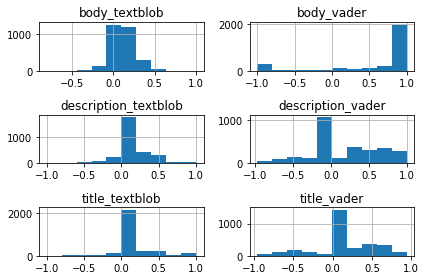

In [255]:
df.hist()
plt.tight_layout()

From these histograms, we can see that description will likely be the best judge of sentiment.
The body may be too noisy (causing a clear difference between vader and textblob), and title may
not give enough info (most of the sentiment seems to be neutral). We continue by using the descrption.

In [256]:
df_sentiment_scores = df[['description_vader', 'description_textblob']]

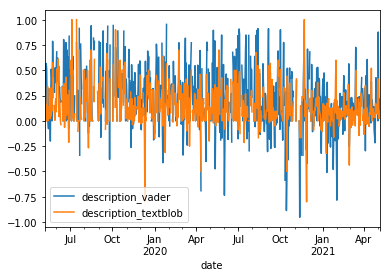

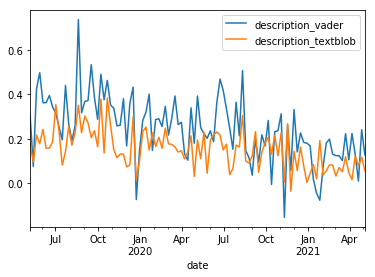

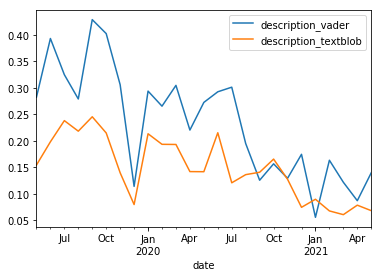

In [257]:
df_sentiment_scores.resample('1D').mean().plot()
df_sentiment_scores.resample('7D').mean().plot()
df_sentiment_scores.resample('1M').mean().plot()

Since there are a lot of neutral values, we may want to see the average sentiment across stronger descriptions.

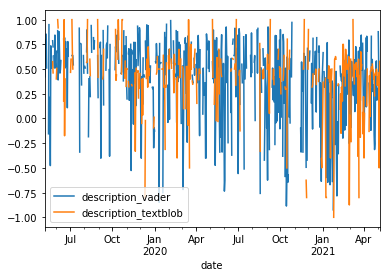

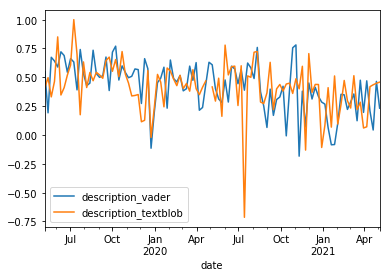

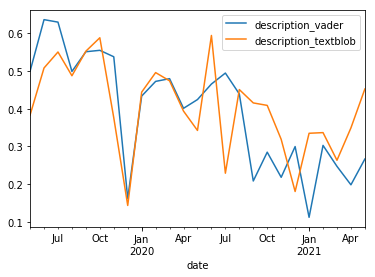

In [258]:
df_sentiment_scores.resample('1D').apply(lambda x: x[(x > 0.3) | (x < -0.3)].mean()).plot()
df_sentiment_scores.resample('7D').apply(lambda x: x[(x > 0.3) | (x < -0.3)].mean()).plot()
df_sentiment_scores.resample('1M').apply(lambda x: x[(x > 0.3) | (x < -0.3)].mean()).plot()

Only positive reviews

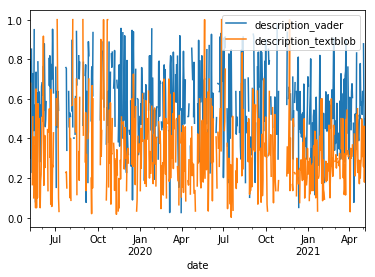

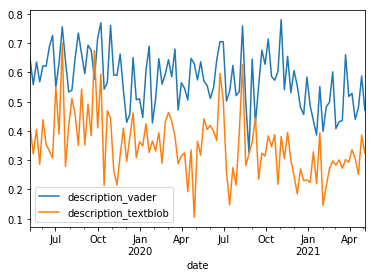

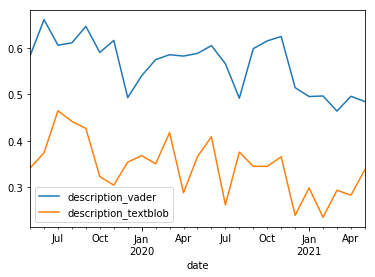

In [259]:
df_sentiment_scores.resample('1D').apply(lambda x: x[x > 0].mean()).plot()
df_sentiment_scores.resample('7D').apply(lambda x: x[x > 0].mean()).plot()
df_sentiment_scores.resample('1M').apply(lambda x: x[x > 0].mean()).plot()

Only negative reviews

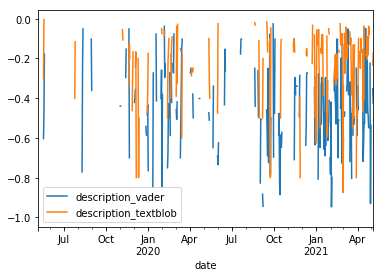

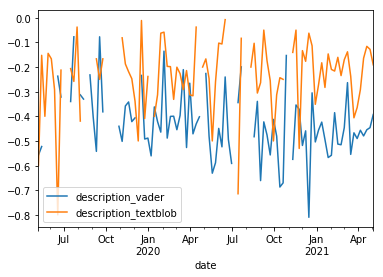

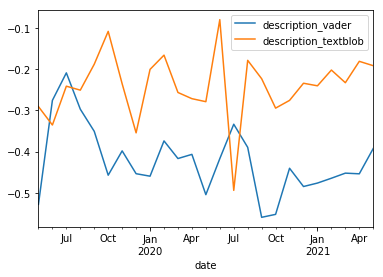

In [260]:
df_sentiment_scores.resample('1D').apply(lambda x: x[x < 0].mean()).plot()
df_sentiment_scores.resample('7D').apply(lambda x: x[x < 0].mean()).plot()
df_sentiment_scores.resample('1M').apply(lambda x: x[x < 0].mean()).plot()

There doesn't seem to be much interesting by looking at the average sentiment over time. We do, however, see two heavy drops
in the graph (although part of it might be due to missing data).

## EDA
High level analysis

### All articles
We start by looking at word frequencies

In [323]:
processed_docs = df.description.apply(lambda x: x.split())
dictionary = gensim.corpora.Dictionary(processed_docs)

id2token = {v: k for k, v in dictionary.token2id.items()}
freq = sorted([(id2token[id], count) for id, count in dictionary.cfs.items()], key=lambda x: -x[1])[:50]
freq[:50]

[('bumbl', 782),
 ('onlin', 422),
 ('market', 401),
 ('report', 361),
 ('new', 336),
 ('peopl', 277),
 ('meet', 254),
 ('best', 251),
 ('user', 247),
 ('love', 244),
 ('tinder', 239),
 ('match', 236),
 ('public', 227),
 ('like', 215),
 ('share', 207),
 ('free', 206),
 ('offer', 198),
 ('look', 189),
 ('women', 187),
 ('site', 184),
 ('initi', 178),
 ('compani', 173),
 ('research', 161),
 ('news', 146),
 ('profil', 143),
 ('singl', 141),
 ('global', 135),
 ('stock', 133),
 ('time', 131),
 ('year', 129),
 ('man', 127),
 ('price', 127),
 ('video', 119),
 ('relationship', 109),
 ('woman', 105),
 ('way', 104),
 ('men', 102),
 ('said', 101),
 ('world', 100),
 ('want', 99),
 ('swipe', 99),
 ('use', 98),
 ('social', 96),
 ('popular', 96),
 ('help', 95),
 ('million', 91),
 ('chat', 91),
 ('met', 91),
 ('billion', 91),
 ('day', 90)]

In [324]:
def get_freq(data):
    words = []
    data.description.apply(lambda x: words.extend(x.split()))
    freqs_dict = Counter(words)
    freqs = sorted(freqs_dict.items(), key=lambda x: -x[1])
    return freqs[:20]


df\
    .groupby(df.index.map(lambda x: x.to_period('Q')))\
    .apply(get_freq)\
    .apply(pd.Series)\
    .reset_index()\
    .transpose()


,0,1,2,3,4,5,6,7,8
date,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2
0,"(date, 152)","(date, 146)","(date, 404)","(date, 394)","(date, 322)","(date, 217)","(date, 224)","(date, 539)","(date, 197)"
1,"(app, 87)","(app, 80)","(app, 259)","(app, 285)","(app, 230)","(app, 200)","(app, 180)","(app, 494)","(app, 186)"
2,"(onlin, 43)","(onlin, 37)","(onlin, 81)","(onlin, 62)","(onlin, 55)","(new, 38)","(bumbl, 48)","(bumbl, 434)","(market, 157)"
3,"(bumbl, 40)","(bumbl, 37)","(bumbl, 57)","(best, 62)","(best, 45)","(peopl, 35)","(peopl, 35)","(market, 223)","(report, 123)"
4,"(free, 26)","(best, 23)","(site, 53)","(love, 54)","(new, 41)","(like, 31)","(new, 35)","(public, 181)","(bumbl, 79)"
5,"(site, 23)","(free, 17)","(free, 53)","(meet, 46)","(peopl, 36)","(love, 30)","(meet, 32)","(report, 171)","(research, 70)"
6,"(best, 21)","(singl, 14)","(user, 46)","(peopl, 44)","(meet, 35)","(tinder, 27)","(love, 32)","(offer, 153)","(match, 66)"
7,"(tinder, 17)","(tinder, 12)","(best, 41)","(free, 42)","(tinder, 28)","(bumbl, 27)","(tinder, 24)","(initi, 145)","(global, 66)"
8,"(look, 14)","(peopl, 12)","(sex, 39)","(user, 41)","(like, 28)","(onlin, 26)","(onlin, 22)","(share, 137)","(new, 56)"


These words seem to make sense given that the topic is Bumble, a dating app.

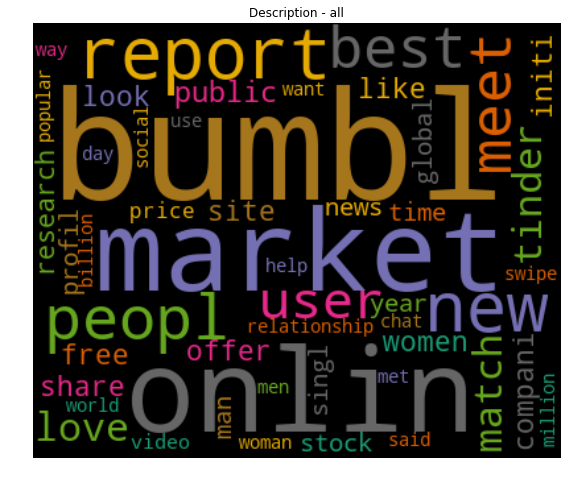

In [326]:
wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(dict(freq))
plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Description - all')
plt.show()

We now look at topic modeling using BoW and LDA.

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
tfidf = gensim.models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [328]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=3, id2word=dictionary, passes=5, workers=5)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.033*"market" + 0.027*"report" + 0.025*"bumbl" + 0.015*"public" + 0.015*"offer" + 0.014*"share" + 0.013*"research" + 0.012*"initi" + 0.011*"global" + 0.010*"price"
Topic: 1 
Words: 0.043*"bumbl" + 0.015*"tinder" + 0.012*"user" + 0.012*"match" + 0.010*"profil" + 0.010*"women" + 0.008*"news" + 0.008*"site" + 0.008*"compani" + 0.007*"onlin"
Topic: 2 
Words: 0.021*"onlin" + 0.017*"new" + 0.016*"peopl" + 0.016*"love" + 0.014*"meet" + 0.013*"best" + 0.011*"free" + 0.011*"like" + 0.010*"look" + 0.009*"bumbl"


In [329]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=3, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.011*"bumbl" + 0.010*"market" + 0.008*"report" + 0.008*"love" + 0.007*"public" + 0.006*"share" + 0.006*"offer" + 0.006*"user" + 0.006*"new" + 0.006*"initi"
Topic: 1 Word: 0.009*"onlin" + 0.007*"tinder" + 0.007*"bumbl" + 0.007*"new" + 0.007*"meet" + 0.006*"singl" + 0.006*"match" + 0.005*"peopl" + 0.005*"site" + 0.005*"best"
Topic: 2 Word: 0.007*"bumbl" + 0.007*"market" + 0.007*"report" + 0.006*"news" + 0.006*"best" + 0.005*"compani" + 0.005*"onlin" + 0.005*"peopl" + 0.004*"man" + 0.004*"latest"


These models seem to suggest two main topics - the first has to do with bumble becoming a public company.
The second has to do with normal news around a new dating app (probably more in line with advertising / promoting bumble).
There are some additional topics that relate to random events as well.
### Positive articles

In [316]:
processed_docs = df.description[df.description_textblob > 0].apply(lambda x: x.split())
dictionary = gensim.corpora.Dictionary(processed_docs)

id2token = {v: k for k, v in dictionary.token2id.items()}
freq = sorted([(id2token[id], count) for id, count in dictionary.cfs.items()], key=lambda x: -x[1])[:50]
freq[:50]

[('bumbl', 308),
 ('new', 301),
 ('onlin', 256),
 ('best', 250),
 ('love', 237),
 ('free', 198),
 ('peopl', 183),
 ('meet', 173),
 ('market', 152),
 ('site', 141),
 ('tinder', 134),
 ('look', 123),
 ('like', 121),
 ('report', 117),
 ('match', 116),
 ('user', 115),
 ('singl', 100),
 ('popular', 92),
 ('latest', 90),
 ('women', 88),
 ('public', 82),
 ('share', 81),
 ('social', 79),
 ('time', 78),
 ('way', 76),
 ('offer', 74),
 ('year', 70),
 ('profil', 69),
 ('want', 67),
 ('news', 67),
 ('relationship', 66),
 ('men', 65),
 ('right', 65),
 ('swipe', 64),
 ('life', 63),
 ('man', 61),
 ('servic', 60),
 ('use', 60),
 ('initi', 60),
 ('help', 59),
 ('video', 58),
 ('compani', 58),
 ('day', 55),
 ('world', 55),
 ('tri', 55),
 ('chat', 54),
 ('partner', 54),
 ('person', 54),
 ('good', 54),
 ('sexual', 52)]

In [317]:
df[df.description_textblob > 0]\
    .groupby(df[df.description_textblob > 0].index.map(lambda x: x.to_period('Q')))\
    .apply(get_freq)\
    .apply(pd.Series)\
    .reset_index()\
    .transpose()



,0,1,2,3,4,5,6,7,8
date,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2
0,"(date, 95)","(date, 94)","(date, 252)","(date, 251)","(date, 220)","(date, 124)","(date, 139)","(date, 257)","(date, 94)"
1,"(app, 61)","(app, 49)","(app, 155)","(app, 184)","(app, 152)","(app, 108)","(app, 103)","(app, 224)","(app, 90)"
2,"(bumbl, 29)","(bumbl, 26)","(onlin, 48)","(best, 62)","(best, 44)","(new, 35)","(new, 32)","(bumbl, 139)","(report, 48)"
3,"(free, 26)","(onlin, 25)","(free, 48)","(love, 53)","(new, 39)","(love, 29)","(love, 30)","(market, 94)","(new, 46)"
4,"(best, 21)","(best, 23)","(site, 43)","(onlin, 44)","(onlin, 35)","(peopl, 26)","(bumbl, 21)","(new, 79)","(market, 46)"
5,"(onlin, 20)","(free, 16)","(best, 41)","(free, 42)","(free, 28)","(onlin, 19)","(peopl, 21)","(public, 60)","(latest, 28)"
6,"(site, 18)","(singl, 12)","(meet, 31)","(meet, 33)","(meet, 27)","(tinder, 18)","(meet, 19)","(share, 54)","(bumbl, 26)"
7,"(tinder, 14)","(love, 10)","(sex, 28)","(site, 30)","(love, 26)","(meet, 18)","(best, 18)","(offer, 52)","(research, 22)"
8,"(new, 14)","(site, 8)","(new, 27)","(look, 29)","(peopl, 25)","(bumbl, 17)","(onlin, 13)","(love, 48)","(match, 17)"


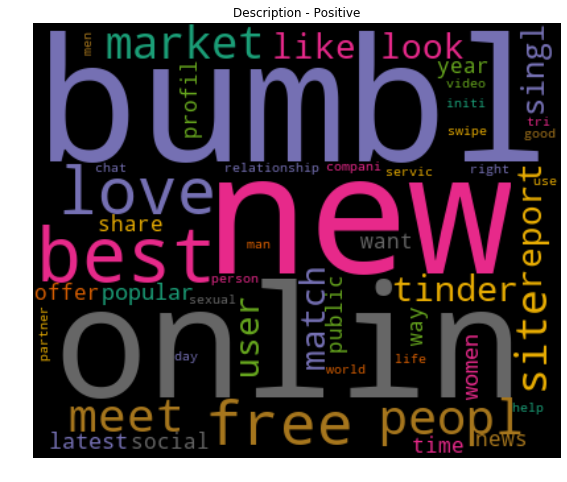

In [319]:
wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(dict(freq))
plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Description - Positive')
plt.show()

In [320]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
tfidf = gensim.models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [321]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=3, id2word=dictionary, passes=5, workers=5)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.027*"new" + 0.024*"love" + 0.019*"free" + 0.018*"meet" + 0.018*"best" + 0.017*"onlin" + 0.014*"look" + 0.014*"tinder" + 0.013*"match" + 0.013*"site"
Topic: 1 
Words: 0.030*"market" + 0.021*"report" + 0.020*"new" + 0.018*"peopl" + 0.015*"latest" + 0.014*"onlin" + 0.012*"global" + 0.012*"research" + 0.011*"studi" + 0.010*"servic"
Topic: 2 
Words: 0.043*"bumbl" + 0.021*"best" + 0.017*"onlin" + 0.014*"public" + 0.012*"news" + 0.011*"initi" + 0.011*"offer" + 0.011*"love" + 0.010*"share" + 0.009*"compani"


In [322]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=3, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.014*"market" + 0.009*"new" + 0.008*"bumbl" + 0.007*"latest" + 0.007*"research" + 0.007*"best" + 0.007*"offer" + 0.007*"public" + 0.006*"onlin" + 0.006*"social"
Topic: 1 Word: 0.012*"love" + 0.009*"new" + 0.009*"best" + 0.008*"tinder" + 0.008*"onlin" + 0.007*"life" + 0.007*"look" + 0.007*"meet" + 0.007*"right" + 0.007*"free"
Topic: 2 Word: 0.011*"best" + 0.011*"bumbl" + 0.010*"site" + 0.010*"onlin" + 0.009*"free" + 0.009*"new" + 0.008*"peopl" + 0.007*"love" + 0.007*"user" + 0.006*"meet"


This doesn't seem to make an obvious difference from including all articles. There does,
however, seem to be a bigger emphasis on more positive topics (like relationships/love).
These seem to be the 'happier' topics.


### Negative articles

In [309]:
processed_docs = df.description[df.description_textblob < 0].apply(lambda x: x.split())
dictionary = gensim.corpora.Dictionary(processed_docs)

id2token = {v: k for k, v in dictionary.token2id.items()}
freq = sorted([(id2token[id], count) for id, count in dictionary.cfs.items()], key=lambda x: -x[1])[:50]
freq[:50]


[('bumbl', 129),
 ('report', 63),
 ('onlin', 53),
 ('price', 49),
 ('share', 48),
 ('like', 44),
 ('stock', 44),
 ('user', 42),
 ('market', 40),
 ('base', 39),
 ('new', 35),
 ('peopl', 35),
 ('target', 35),
 ('bmbl', 34),
 ('fake', 33),
 ('initi', 33),
 ('meet', 32),
 ('tinder', 32),
 ('profil', 31),
 ('research', 29),
 ('nasdaq', 29),
 ('rate', 29),
 ('compani', 28),
 ('offer', 28),
 ('firm', 27),
 ('public', 27),
 ('match', 26),
 ('man', 25),
 ('potenti', 24),
 ('set', 24),
 ('coverag', 23),
 ('previous', 23),
 ('site', 23),
 ('time', 22),
 ('arrest', 22),
 ('issu', 22),
 ('black', 22),
 ('analyst', 22),
 ('women', 22),
 ('look', 20),
 ('game', 20),
 ('met', 20),
 ('video', 19),
 ('woman', 19),
 ('chang', 19),
 ('said', 19),
 ('casual', 19),
 ('start', 18),
 ('relationship', 18),
 ('victim', 18)]

In [311]:
df[df.description_textblob < 0]\
    .groupby(df[df.description_textblob < 0].index.map(lambda x: x.to_period('Q')))\
    .apply(get_freq)\
    .apply(pd.Series)\
    .reset_index()\
    .transpose()

,0,1,2,3,4,5,6,7,8
date,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2
0,"(date, 12)","(date, 9)","(date, 62)","(date, 52)","(date, 29)","(app, 27)","(date, 26)","(date, 87)","(date, 20)"
1,"(app, 5)","(app, 8)","(app, 44)","(app, 34)","(app, 23)","(date, 25)","(app, 26)","(app, 81)","(app, 17)"
2,"(onlin, 4)","(bumbl, 4)","(user, 16)","(peopl, 7)","(onlin, 10)","(like, 12)","(bumbl, 12)","(bumbl, 75)","(nbsp, 16)"
3,"(bumbl, 3)","(applic, 3)","(fake, 13)","(base, 7)","(site, 6)","(happn, 7)","(tinder, 6)","(report, 42)","(market, 15)"
4,"(peopl, 3)","(hamilton, 3)","(bumbl, 12)","(onlin, 6)","(like, 6)","(delhi, 6)","(connect, 5)","(stock, 37)","(bumbl, 13)"
5,"(lectur, 3)","(thing, 2)","(onlin, 11)","(meet, 6)","(bumbl, 5)","(casual, 5)","(peopl, 5)","(price, 36)","(share, 11)"
6,"(introduc, 2)","(creat, 2)","(account, 10)","(site, 5)","(thing, 4)","(polic, 5)","(look, 4)","(share, 33)","(research, 11)"
7,"(video, 2)","(build, 2)","(sharon, 9)","(way, 4)","(feel, 4)","(profil, 5)","(relationship, 4)","(initi, 30)","(report, 11)"
8,"(time, 2)","(like, 2)","(stone, 9)","(tinder, 4)","(chang, 4)","(base, 5)","(met, 4)","(bmbl, 28)","(video, 10)"


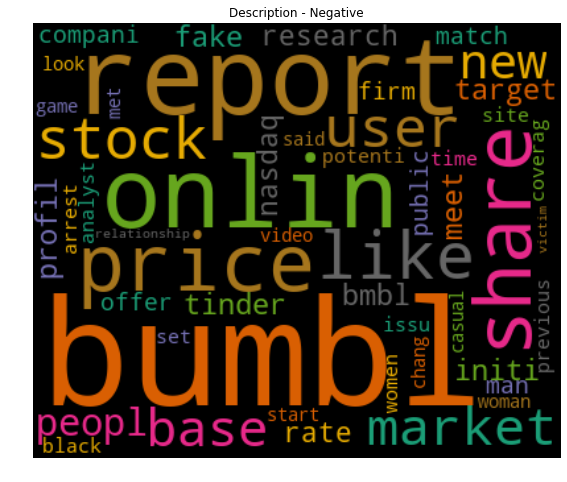

In [312]:
wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(dict(freq))
plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Description - Negative')
plt.show()

In [ ]:


bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
tfidf = gensim.models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [314]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=3, id2word=dictionary, passes=5, workers=5)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.025*"fake" + 0.023*"bumbl" + 0.020*"user" + 0.019*"man" + 0.019*"met" + 0.018*"arrest" + 0.016*"profil" + 0.015*"onlin" + 0.015*"market" + 0.014*"said"
Topic: 1 
Words: 0.034*"onlin" + 0.034*"like" + 0.028*"base" + 0.023*"peopl" + 0.019*"match" + 0.018*"new" + 0.018*"meet" + 0.017*"site" + 0.016*"user" + 0.015*"women"
Topic: 2 
Words: 0.071*"bumbl" + 0.038*"report" + 0.036*"price" + 0.032*"stock" + 0.032*"share" + 0.026*"target" + 0.025*"bmbl" + 0.024*"initi" + 0.021*"nasdaq" + 0.020*"rate"


In [315]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=3, id2word=dictionary, passes=5, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.019*"man" + 0.017*"woman" + 0.015*"met" + 0.015*"price" + 0.015*"arrest" + 0.015*"victim" + 0.014*"stock" + 0.014*"polic" + 0.012*"potenti" + 0.012*"target"
Topic: 1 Word: 0.024*"onlin" + 0.021*"new" + 0.020*"black" + 0.020*"peopl" + 0.017*"base" + 0.017*"site" + 0.016*"like" + 0.016*"casual" + 0.016*"partner" + 0.016*"meet"
Topic: 2 Word: 0.025*"market" + 0.023*"bumbl" + 0.017*"fake" + 0.016*"offer" + 0.016*"public" + 0.016*"user" + 0.015*"report" + 0.014*"profil" + 0.013*"initi" + 0.012*"account"


By looking at the word frequencies, we can see slightly more negative words (fake, victim, etc).
However, the frequency of negative articles is much less, so it's hard to come to a conclusive
description.


We can see similar topics:
- stock market
- general negative problems with bumble
- general about bumble

# Volume of data

Text(0.5, 1.0, 'Number of articles per day')

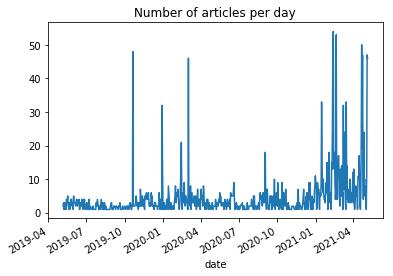

In [282]:
df.groupby('date').count().iloc[:,0].plot()
plt.title('Number of articles per day')

In [295]:
df.groupby('date').count().iloc[:,0].sort_values(ascending=False)[:20]

date
2021-02-12    54
2021-02-19    53
2021-02-11    52
2021-04-21    50
2019-10-21    48
2021-05-04    47
2021-04-23    47
2021-05-05    46
2020-03-02    46
2021-01-15    33
2021-03-15    33
2021-03-08    32
2019-12-30    32
2021-02-10    27
2021-04-26    24
2021-03-11    24
2021-04-20    23
2020-02-14    21
2021-04-22    19
2020-09-02    18
Name: body, dtype: int64

In [296]:
df['2019-12-30'].title

date
2019-12-30    yes sharon stone profil bumbl date app                                      
2019-12-30    bumbl date app block sharon stone user thought profil fake                  
2019-12-30    actress sharon stone block date app bumbl video                             
2019-12-30    sharon stone block date app bumbl                                           
2019-12-30    sharon stone block date app fake account                                    
2019-12-30    sharon stone use date app bumbl                                             
2019-12-30    sharon stone date profil restor block                                       
2019-12-30    date app bumbl block sharon stone user thought profil fake                  
2019-12-30    sharon stone kick bumbl date app video                                      
2019-12-30    sharon stone disbelief date app bumbl block                                 
2019-12-30    bumbl apolog kick sharon stone date app                                

/Users/shreysamdani/anaconda3/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'log(# positive / # negative) per day')

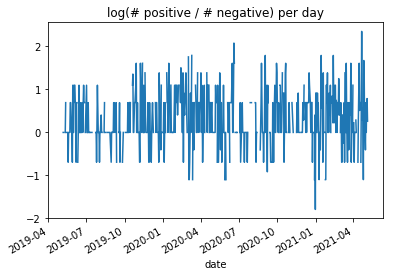

In [284]:
df.groupby('date').apply(lambda x: np.log((x.description_textblob > 0).sum() / (1+(x.description_textblob < 0).sum()))).plot()
plt.title('log(# positive / # negative) per day')

Overall, looking at the volume, we can see that there was a spike in early 2021.
The other spikes in volumes seem to be correlated to certain events (as shown for
one of the dates above). However, even since the mentioning of bumble IPO, the articles
seem to be much more heavy in volume.